In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
data_dir = r'C:\Users\Yashaswini.A.H\Desktop\dataset\AI-face-detection-Dataset'

classes = os.listdir(data_dir)
print("Classes found:", classes)

Classes found: ['AI', 'real']


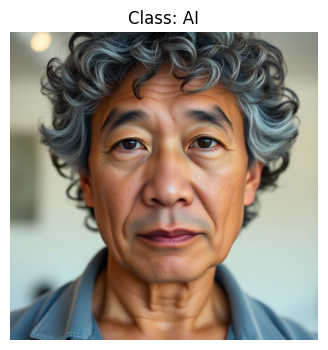

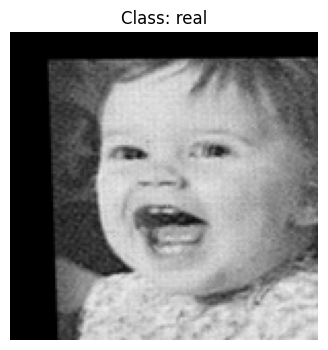

In [3]:
import matplotlib.pyplot as plt
import cv2

for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    image_files = os.listdir(cls_path)
    if image_files:
        img_path = os.path.join(cls_path, image_files[0])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(f"Class: {cls}")
        plt.axis('off')
        plt.show()


Found 2563 images belonging to 2 classes.
Found 640 images belonging to 2 classes.
Class indices: {'AI': 0, 'real': 1}


C:\Users\Yashaswini.A.H\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.6082 - loss: 5.0486 - val_accuracy: 0.6875 - val_loss: 0.5422
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.6898 - loss: 0.5233 - val_accuracy: 0.6875 - val_loss: 0.5033
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - accuracy: 0.7506 - loss: 0.4611 - val_accuracy: 0.7875 - val_loss: 0.4673
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.7393 - loss: 0.4642 - val_accuracy: 0.8281 - val_loss: 0.4665
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.7788 - loss: 0.4381 - val_accuracy: 0.8109 - val_loss: 0.4258
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.7323 - loss: 0.4571 - val_accuracy: 0.8344 - val_loss: 0.4171
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.7810 - loss: 0.4233 - val_accuracy: 0.8469 - val_loss: 0.4127
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.7893 - loss: 0.4105 - val_accuracy: 0.8531 - v

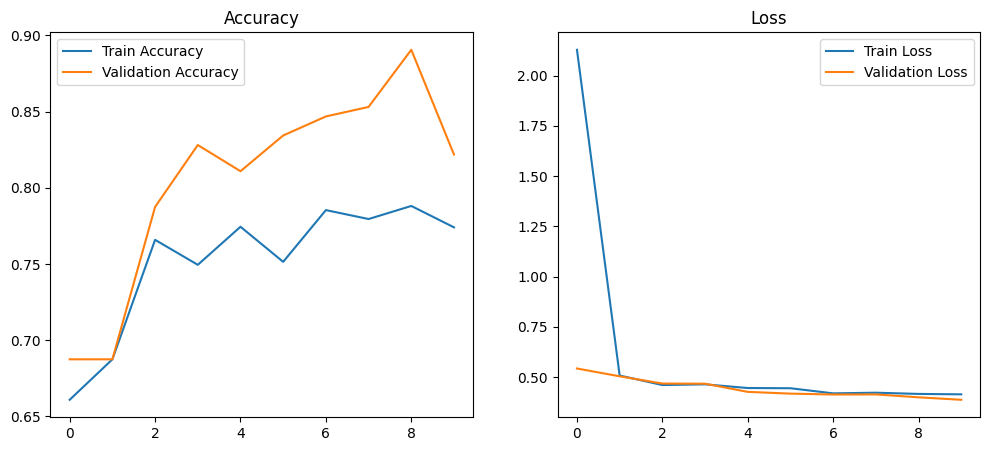

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

# Define dataset paths
data_dir = r'C:\Users\Yashaswini.A.H\Desktop\dataset\AI-face-detection-Dataset' # Replace with your dataset path

# Data Augmentation with Flipping and Reversing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Flip images vertically
    validation_split=0.2,            # Normalize pixel values to [0, 1]
    rotation_range=20,         # Random rotations in degrees
    width_shift_range=0.2,     # Random horizontal shifts
    height_shift_range=0.2,    # Random vertical shifts
    shear_range=0.2,           # Shear transformations
    zoom_range=0.2,            # Random zoom# 20% data for validation
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
print("Class indices:", train_data.class_indices)

# Load Pretrained ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Build the Model
model = keras.Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
epochs = 10
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# Save the Model
model.save("deepfake_detection.h5")

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()


Found 2563 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


C:\Users\Yashaswini.A.H\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - accuracy: 0.6118 - loss: 3.0232 - val_accuracy: 0.6875 - val_loss: 0.5292
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.7150 - loss: 0.4799 - val_accuracy: 0.7594 - val_loss: 0.4781
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.7720 - loss: 0.4574 - val_accuracy: 0.7688 - val_loss: 0.5147
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.7622 - loss: 0.4822 - val_accuracy: 0.7969 - val_loss: 0.4601
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.7458 - loss: 0.4640 - val_accuracy: 0.7063 - val_loss: 0.5647
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.6757 - loss: 0.4893 - val_accuracy: 0.8000 - val_loss: 0.4789
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 224s 3s/step - accuracy: 0.7140 - loss: 0.4653 - val_accuracy: 0.7500 - val_loss: 0.5275
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 227s 3s/step - accuracy: 0.7606 - loss: 0.4526 - val_accuracy: 0.8625 - v

Found 3203 images belonging to 2 classes.
Class Index Mapping: {'AI': 0, 'Real': 1}
101/101 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.9036 - loss: 0.5028
Test Accuracy: 94.66%
101/101 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step
              precision    recall  f1-score   support

          AI       0.96      0.86      0.91      1001
        Real       0.94      0.98      0.96      2202

    accuracy                           0.95      3203
   macro avg       0.95      0.92      0.94      3203
weighted avg       0.95      0.95      0.95      3203



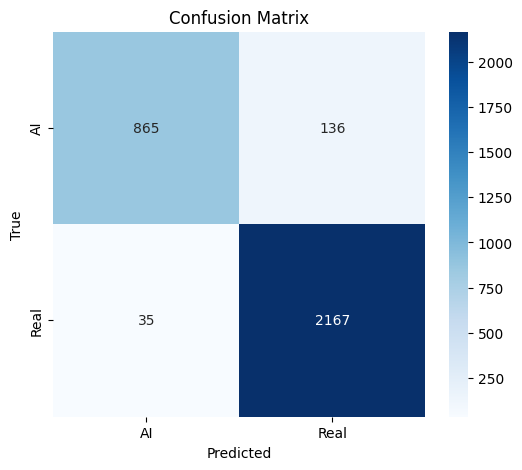

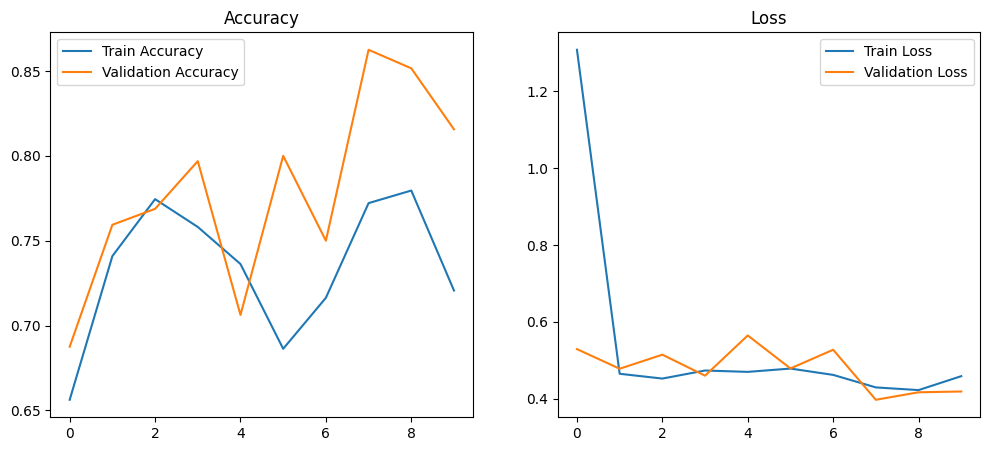

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define dataset paths
data_dir =  r'C:\Users\Yashaswini.A.H\Desktop\dataset\AI-face-detection-Dataset'  # Replace with your dataset path
test_dir = r'C:\Users\Yashaswini.A.H\Desktop\test' # Ensure this points to the test dataset structure

# Data Augmentation with Flipping and Reversing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Flip images vertically
    validation_split=0.2,            # Normalize pixel values to [0, 1]
    rotation_range=20,         # Random rotations in degrees
    width_shift_range=0.2,     # Random horizontal shifts
    height_shift_range=0.2,    # Random vertical shifts
    shear_range=0.2,           # Shear transformations
    zoom_range=0.2,    # 20% data for validation
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load Pretrained ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Build the Model
model = keras.Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
epochs = 10
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# Save the Model
model.save("deepfake_detector.h5")

# Prepare Test Dataset (AI and Real folders inside test_dir)
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_data = test_datagen.flow_from_directory(
    test_dir,  # Ensure this points to "/path_to_test_dataset/"
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Keep order for correct evaluation
)

# Print class labels mapping
print("Class Index Mapping:", test_data.class_indices)  # Should print {'AI': 0, 'Real': 1}

# Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate Predictions
predictions = model.predict(test_data)
predicted_classes = (predictions > 0.5).astype(int)

# Get True Labels
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Print Classification Report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Display Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()


In [ ]:
%pip install sklearn

In [6]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


Found 21 images belonging to 2 classes.


C:\Users\Yashaswini.A.H\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Class Index Mapping: {'AI': 0, 'Real': 1}
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.6802 - loss: 0.6896 
Test Accuracy: 61.90%
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step 
Classification Report:
              precision    recall  f1-score   support

          AI       0.64      0.64      0.64        11
        Real       0.60      0.60      0.60        10

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.62      0.62      0.62        21



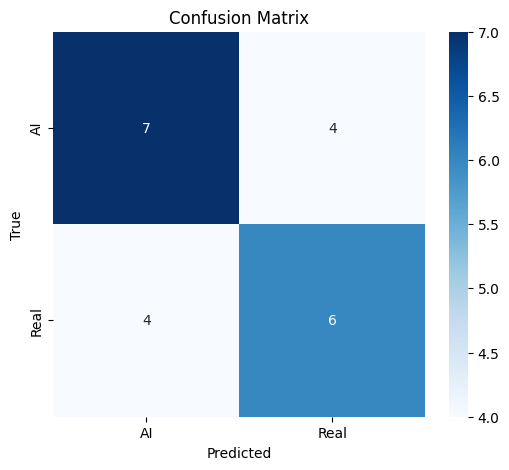

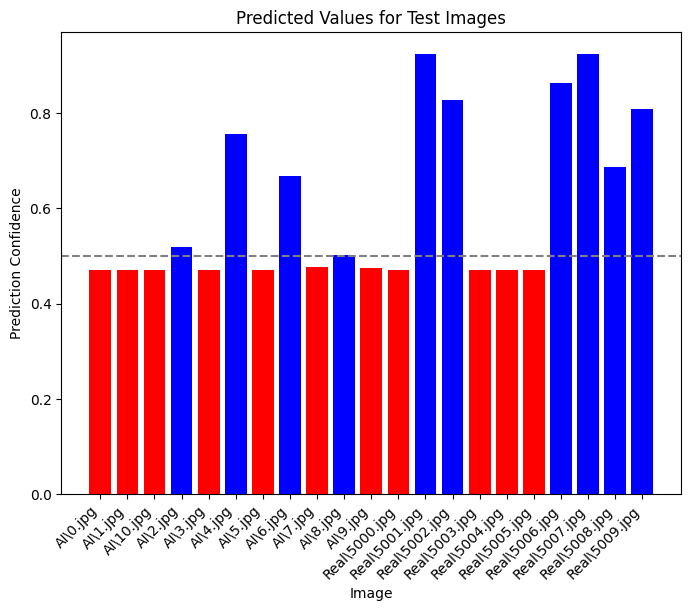

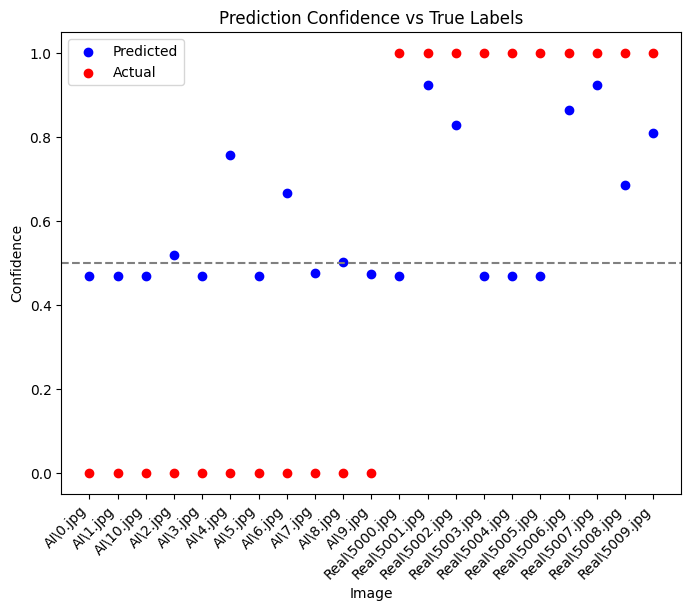

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os

# Load the trained model
model = keras.models.load_model("deepfake_detector.h5")

# Define the test dataset path
test_dir = r'C:\Users\Yashaswini.A.H\Desktop\test2'  # Replace with the correct path

# Prepare Test Dataset (AI and Real folders inside test_dir)
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Process one image at a time since dataset is small
    class_mode='binary',
    shuffle=False
)

# Print class labels mapping
print("Class Index Mapping:", test_data.class_indices)  # Should print {'AI': 0, 'Real': 1}

# Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate Predictions
predictions = model.predict(test_data)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Get True Labels
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Print Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Display Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot Prediction Values
plt.figure(figsize=(8, 6))
plt.bar(range(len(predictions)), predictions.flatten(), color=['red' if x < 0.5 else 'blue' for x in predictions.flatten()])
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.xticks(range(len(predictions)), test_data.filenames, rotation=45, ha='right')
plt.xlabel("Image")
plt.ylabel("Prediction Confidence")
plt.title("Predicted Values for Test Images")
plt.show()

# Graph of Predicted Values vs True Labels
plt.figure(figsize=(8, 6))
plt.scatter(range(len(predictions)), predictions.flatten(), label="Predicted", color='blue')
plt.scatter(range(len(true_classes)), true_classes, label="Actual", color='red')
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.xticks(range(len(predictions)), test_data.filenames, rotation=45, ha='right')
plt.xlabel("Image")
plt.ylabel("Confidence")
plt.legend()
plt.title("Prediction Confidence vs True Labels")
plt.show() 


Found 11 images belonging to 1 classes.
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step
Image: both_images\36.jpg -> Predicted: AI (0.47)
Image: both_images\37.jpg -> Predicted: Real (0.52)
Image: both_images\38.jpg -> Predicted: AI (0.47)
Image: both_images\39.jpg -> Predicted: Real (0.80)
Image: both_images\40.jpg -> Predicted: AI (0.47)
Image: both_images\5036.jpg -> Predicted: AI (0.48)
Image: both_images\5037.jpg -> Predicted: Real (0.97)
Image: both_images\5038.jpg -> Predicted: Real (0.65)
Image: both_images\5048.jpg -> Predicted: AI (0.47)
Image: both_images\5049.jpg -> Predicted: Real (0.95)
Image: both_images\5050.jpg -> Predicted: AI (0.47)
Classification Report:
              precision    recall  f1-score   support

          AI       0.00      0.00      0.00         0
        Real       1.00      0.45      0.62        11

    accuracy                           0.45        11
   macro avg       0.50      0.23      0.31        11
weighted avg       1.00      0.45      0.62        1

C:\Users\Yashaswini.A.H\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yashaswini.A.H\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yashaswini.A.H\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

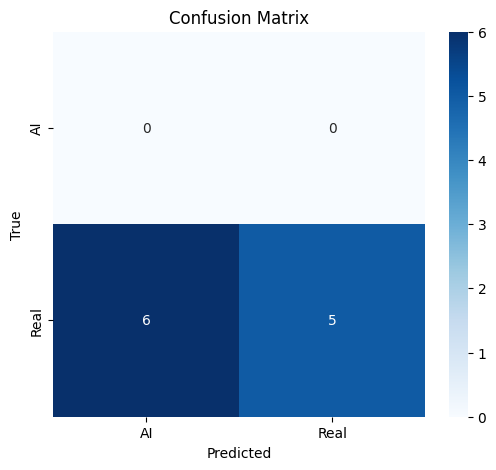

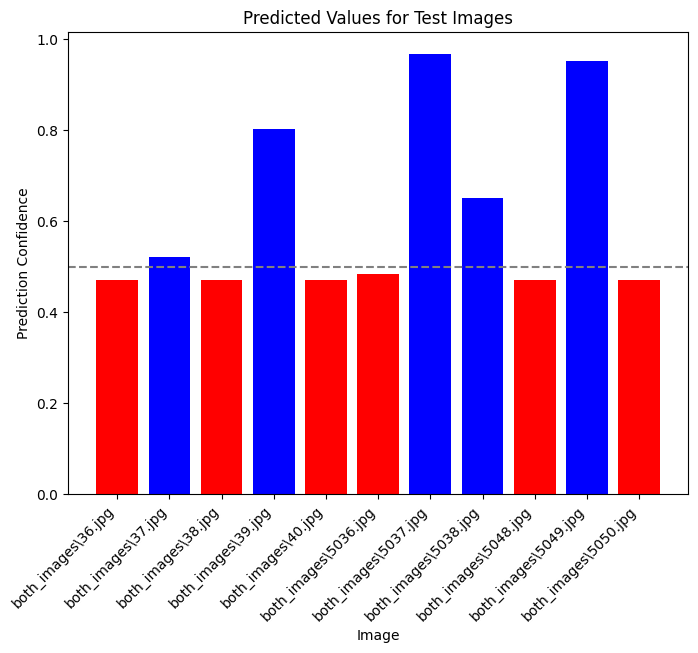

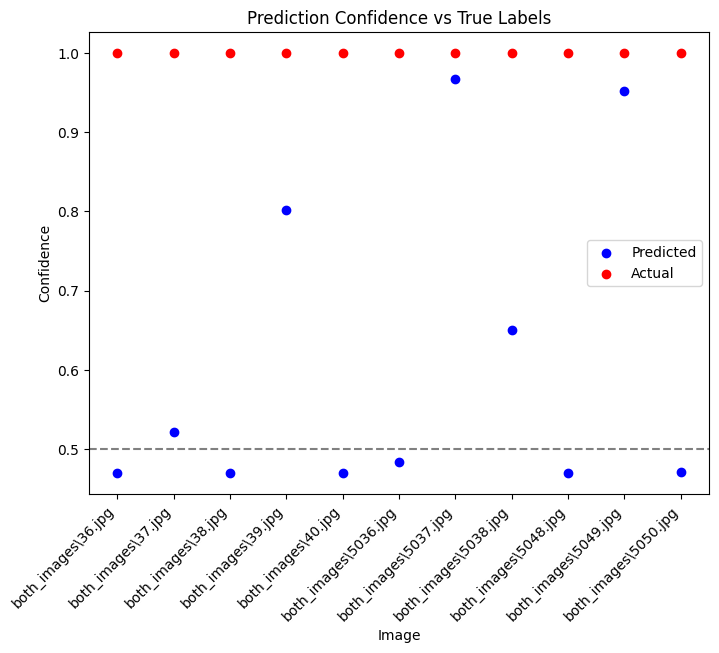

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os
import cv2

# Load the trained model
model = keras.models.load_model("deepfake_detector.h5")

# Define the test dataset path
test_dir = r"C:\Users\Yashaswini.A.H\Desktop\test3"  # Replace with the correct path

# Check if dataset path exists and contains images
if not os.path.exists(test_dir) or len(os.listdir(test_dir)) == 0:
    raise ValueError("Test dataset path is empty or does not exist. Please check the folder path.")

# Prepare Test Dataset (All images in one folder)
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Process one image at a time since dataset is small
    class_mode=None,  # No class labels since images are mixed
    shuffle=False
)

# Ensure dataset is not empty
if test_data.samples == 0:
    raise ValueError("No images found in the test dataset. Please check the directory structure and image formats.")

# Get file names
file_names = test_data.filenames

# Generate Predictions
predictions = model.predict(test_data)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Map Predictions to Labels
class_labels = ['AI', 'Real']  # Assuming 0 -> AI, 1 -> Real
predicted_labels = [class_labels[i] for i in predicted_classes]

# Print Predictions for Each Image
for i, file in enumerate(file_names):
    print(f"Image: {file} -> Predicted: {predicted_labels[i]} ({predictions[i][0]:.2f})")

# Create True Labels Manually (if known)
true_labels = [0 if 'AI' in file else 1 for file in file_names]  # Adjust based on file names

# Print Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_classes, target_names=class_labels))

# Display Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot Prediction Confidence Values
plt.figure(figsize=(8, 6))
plt.bar(range(len(predictions)), predictions.flatten(), color=['red' if x < 0.5 else 'blue' for x in predictions.flatten()])
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.xticks(range(len(predictions)), file_names, rotation=45, ha='right')
plt.xlabel("Image")
plt.ylabel("Prediction Confidence")
plt.title("Predicted Values for Test Images")
plt.show()

# Graph of Predicted Values vs True Labels
plt.figure(figsize=(8, 6))
plt.scatter(range(len(predictions)), predictions.flatten(), label="Predicted", color='blue')
plt.scatter(range(len(true_labels)), true_labels, label="Actual", color='red')
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.xticks(range(len(predictions)), file_names, rotation=45, ha='right')
plt.xlabel("Image")
plt.ylabel("Confidence")
plt.legend()
plt.title("Prediction Confidence vs True Labels")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Image: 0_20241130135552_A_close-up_shot_of_a_middle-aged_genderqueer_perso.jpg
Predicted: AI-Generated
Confidence: 53.04%
Raw Model Output: 0.4696


C:\Users\Yashaswini.A.H\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


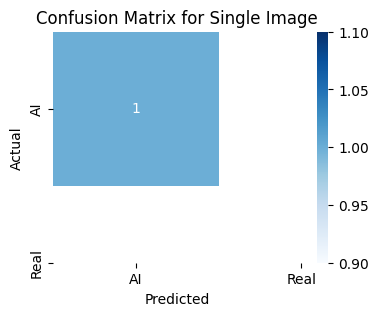

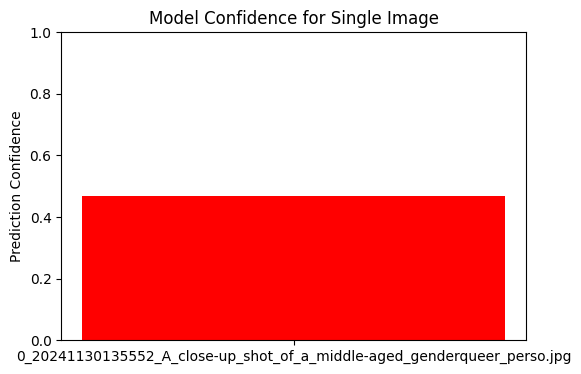

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.metrics import confusion_matrix

# Load the trained model
model = keras.models.load_model("deepfake_detector.h5")

# Define the test image path
test_image_path = r"C:\Users\Yashaswini.A.H\Desktop\test4\proto"

# Check if directory exists
if not os.path.exists(test_image_path):
    raise ValueError("Test directory does not exist. Please check the path.")

# Get the image file
image_files = [f for f in os.listdir(test_image_path) if f.endswith(('png', 'jpg', 'jpeg'))]
if len(image_files) == 0:
    raise ValueError("No image files found in the directory.")

image_path = os.path.join(test_image_path, image_files[0])

# Load and preprocess the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img_array = img / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input

# Generate Prediction
prediction = model.predict(img_array)[0][0]
confidence = prediction * 100 if prediction > 0.5 else (1 - prediction) * 100
predicted_label = "Real" if prediction > 0.5 else "AI-Generated"

# Print Results
print(f"Image: {image_files[0]}")
print(f"Predicted: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")
print(f"Raw Model Output: {prediction:.4f}")

# Create Confusion Matrix (For one image, this is just illustrative)
true_label = 1 if "Real" in image_files[0] else 0  # Adjust based on filename
predicted_label_num = 1 if predicted_label == "Real" else 0
cm = confusion_matrix([true_label], [predicted_label_num])

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["AI", "Real"], yticklabels=["AI", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Single Image")
plt.show()

# Plot Prediction Confidence
plt.figure(figsize=(6, 4))
plt.bar([0], [prediction], color=['red' if prediction < 0.5 else 'blue'])
plt.xticks([0], [image_files[0]])
plt.ylabel("Prediction Confidence")
plt.title("Model Confidence for Single Image")
plt.ylim(0, 1)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image: 5212.jpg
Predicted: Real
Confidence: 84.48%
Raw Model Output: 0.8448


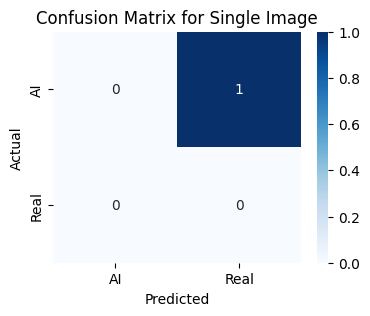

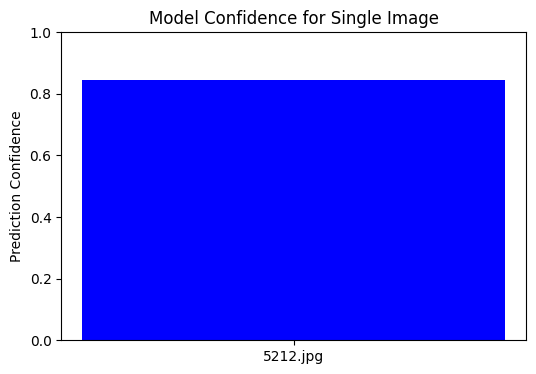

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.metrics import confusion_matrix

# Load the trained model
model = keras.models.load_model("deepfake_detector.h5")

# Define the test image path
test_image_path = r"C:\Users\Yashaswini.A.H\Desktop\test5\proto1"

# Check if directory exists
if not os.path.exists(test_image_path):
    raise ValueError("Test directory does not exist. Please check the path.")

# Get the image file
image_files = [f for f in os.listdir(test_image_path) if f.endswith(('png', 'jpg', 'jpeg'))]
if len(image_files) == 0:
    raise ValueError("No image files found in the directory.")

image_path = os.path.join(test_image_path, image_files[0])

# Load and preprocess the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img_array = img / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input

# Generate Prediction
prediction = model.predict(img_array)[0][0]
confidence = prediction * 100 if prediction > 0.5 else (1 - prediction) * 100
predicted_label = "Real" if prediction > 0.5 else "AI-Generated"

# Print Results
print(f"Image: {image_files[0]}")
print(f"Predicted: {predicted_label}")
print(f"Confidence: {confidence:.2f}%")
print(f"Raw Model Output: {prediction:.4f}")

# Create Confusion Matrix (For one image, this is just illustrative)
true_label = 1 if "Real" in image_files[0] else 0  # Adjust based on filename
predicted_label_num = 1 if predicted_label == "Real" else 0
cm = confusion_matrix([true_label], [predicted_label_num])

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["AI", "Real"], yticklabels=["AI", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Single Image")
plt.show()

# Plot Prediction Confidence
plt.figure(figsize=(6, 4))
plt.bar([0], [prediction], color=['red' if prediction < 0.5 else 'blue'])
plt.xticks([0], [image_files[0]])
plt.ylabel("Prediction Confidence")
plt.title("Model Confidence for Single Image")
plt.ylim(0, 1)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


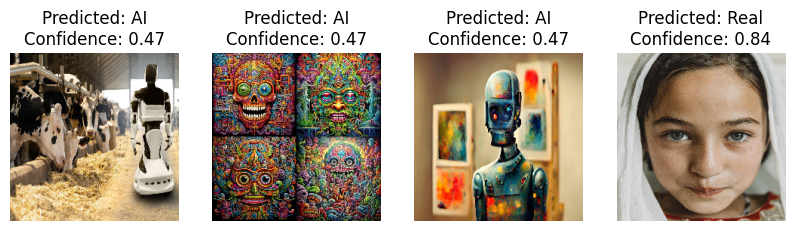

Image: 189.jpg -> Predicted: AI (Confidence: 0.47)
Image: 190.jpg -> Predicted: AI (Confidence: 0.47)
Image: 191.jpg -> Predicted: AI (Confidence: 0.47)
Image: 5212.jpg -> Predicted: Real (Confidence: 0.84)


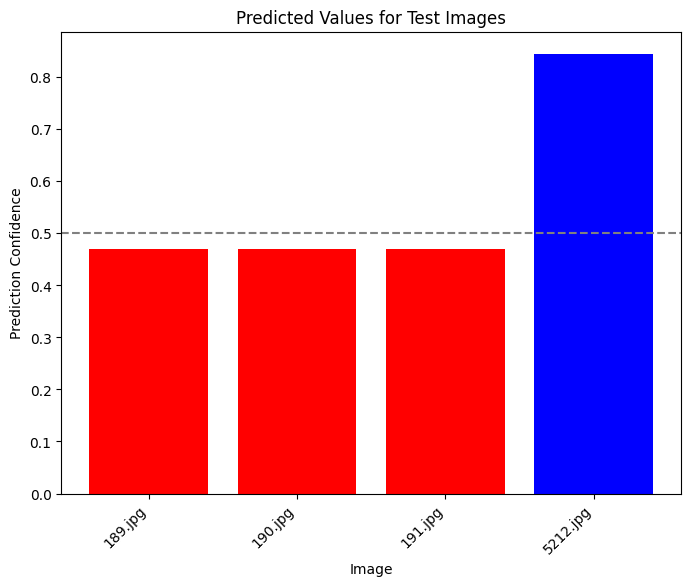

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.metrics import confusion_matrix

# Load the trained model
model = keras.models.load_model("deepfake_detector.h5")

# Define the test directory
test_directory = r"C:\Users\Yashaswini.A.H\Desktop\test5\proto1"

# Get all image file paths from the directory
image_paths = [os.path.join(test_directory, img) for img in os.listdir(test_directory) if img.lower().endswith(('png', 'jpg', 'jpeg'))]

# Function to preprocess images
def preprocess_image(image_path):
    if not os.path.exists(image_path):
        print(f"Error: File not found - {image_path}")
        return None
    
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return None  # Return None if image loading fails

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0  # Normalize
    return image

# Load and preprocess images, filtering out any failed loads
test_images = [preprocess_image(img) for img in image_paths if preprocess_image(img) is not None]

# Check if we have valid images to process
if len(test_images) == 0:
    raise ValueError("No valid images found for prediction. Please check the file paths.")

test_images = np.array(test_images)

# Make predictions
predictions = model.predict(test_images)

# Define class labels
class_labels = ['AI', 'Real']  
predicted_classes = (predictions > 0.5).astype(int).flatten()
predicted_labels = [class_labels[i] for i in predicted_classes]

# Display images with predictions
fig, axes = plt.subplots(1, len(test_images), figsize=(10, 5))
if len(test_images) == 1:
    axes = [axes]  # Ensure axes is iterable for a single image

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.set_title(f"Predicted: {predicted_labels[i]}\nConfidence: {predictions[i][0]:.2f}")
    ax.axis("off")
plt.show()

# Print predictions
for i, image_path in enumerate(image_paths):
    if i < len(predicted_labels):
        print(f"Image: {os.path.basename(image_path)} -> Predicted: {predicted_labels[i]} (Confidence: {predictions[i][0]:.2f})")

# Generate confusion matrix (assuming ground truth is known)
true_labels = [0, 1]  # Adjust based on actual labels if known
if len(true_labels) == len(predicted_classes):  # Ensure they match in length
    cm = confusion_matrix(true_labels, predicted_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Plot prediction confidence values
plt.figure(figsize=(8, 6))
plt.bar(range(len(predictions)), predictions.flatten(), color=['red' if x < 0.5 else 'blue' for x in predictions.flatten()])
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.xticks(range(len(predictions)), [os.path.basename(img) for img in image_paths if os.path.exists(img)], rotation=45, ha='right')
plt.xlabel("Image")
plt.ylabel("Prediction Confidence")
plt.title("Predicted Values for Test Images")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


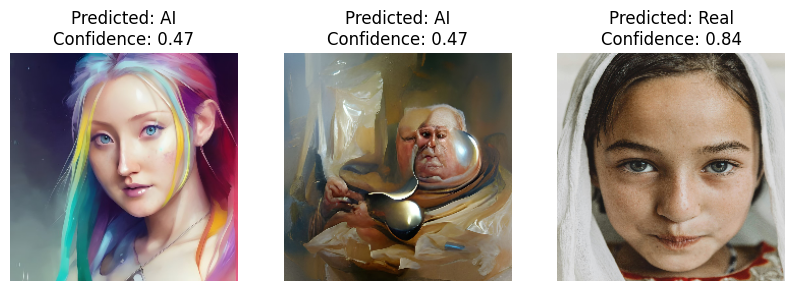

Image: 0.jpg -> Predicted: AI (Confidence: 0.47)
Image: 1.jpg -> Predicted: AI (Confidence: 0.47)
Image: 5212.jpg -> Predicted: Real (Confidence: 0.84)


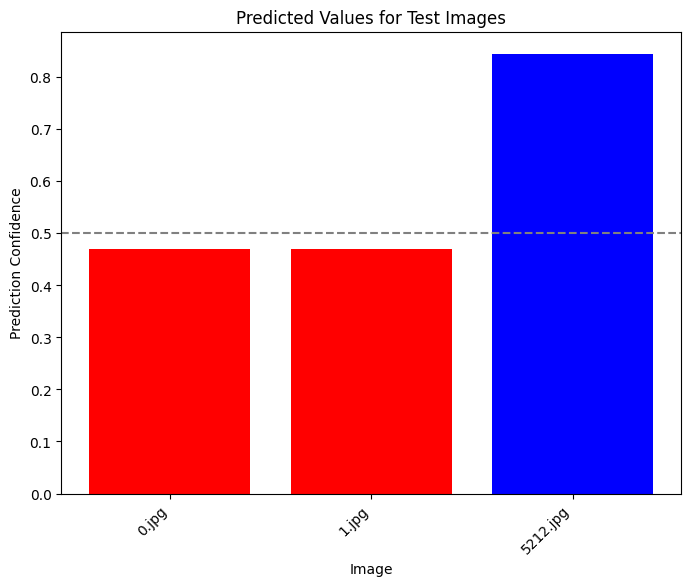

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.metrics import confusion_matrix

# Load the trained model
model = keras.models.load_model("deepfake_detector.h5")

# Define the test directory
test_directory = r"C:\Users\Yashaswini.A.H\Desktop\test5\proto1"

# Get all image file paths from the directory
image_paths = [os.path.join(test_directory, img) for img in os.listdir(test_directory) if img.lower().endswith(('png', 'jpg', 'jpeg'))]

# Function to preprocess images
def preprocess_image(image_path):
    if not os.path.exists(image_path):
        print(f"Error: File not found - {image_path}")
        return None
    
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return None  # Return None if image loading fails

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0  # Normalize
    return image

# Load and preprocess images, filtering out any failed loads
test_images = [preprocess_image(img) for img in image_paths if preprocess_image(img) is not None]

# Check if we have valid images to process
if len(test_images) == 0:
    raise ValueError("No valid images found for prediction. Please check the file paths.")

test_images = np.array(test_images)

# Make predictions
predictions = model.predict(test_images)

# Define class labels
class_labels = ['AI', 'Real']  
predicted_classes = (predictions > 0.5).astype(int).flatten()
predicted_labels = [class_labels[i] for i in predicted_classes]

# Display images with predictions
fig, axes = plt.subplots(1, len(test_images), figsize=(10, 5))
if len(test_images) == 1:
    axes = [axes]  # Ensure axes is iterable for a single image

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.set_title(f"Predicted: {predicted_labels[i]}\nConfidence: {predictions[i][0]:.2f}")
    ax.axis("off")
plt.show()

# Print predictions
for i, image_path in enumerate(image_paths):
    if i < len(predicted_labels):
        print(f"Image: {os.path.basename(image_path)} -> Predicted: {predicted_labels[i]} (Confidence: {predictions[i][0]:.2f})")

# Generate confusion matrix (assuming ground truth is known)
true_labels = [0, 1]  # Adjust based on actual labels if known
if len(true_labels) == len(predicted_classes):  # Ensure they match in length
    cm = confusion_matrix(true_labels, predicted_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Plot prediction confidence values
plt.figure(figsize=(8, 6))
plt.bar(range(len(predictions)), predictions.flatten(), color=['red' if x < 0.5 else 'blue' for x in predictions.flatten()])
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.xticks(range(len(predictions)), [os.path.basename(img) for img in image_paths if os.path.exists(img)], rotation=45, ha='right')
plt.xlabel("Image")
plt.ylabel("Prediction Confidence")
plt.title("Predicted Values for Test Images")
plt.show()
